## Setup evnironment

In [3]:
import os
import numpy as np
import pandas as pd
import json
from skimage.io import imread

In [4]:
from psf import compute, plotPSF

## Setup plotting

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper', font_scale=2.0)
sns.set_style('ticks')

In [6]:
from ipywidgets import interactive
from ipywidgets import IntSlider
from IPython.display import display

## Define parameters

In [7]:
FOVumLat = 61.0
FOVpxLat = 512.0 # 512
pxPerUmLat = FOVpxLat/FOVumLat
pxPerUmAx = 2.0 # 2.0
wavelength = 970.0
NA = 0.6
windowUm = [12, 2, 2]
options = {'FOVumLat':FOVumLat, 'FOVpxLat':FOVpxLat, 'pxPerUmLat':FOVpxLat/FOVumLat, 'pxPerUmAx':pxPerUmAx, 'wavelength':970.0, 'NA':0.6, 'windowUm':windowUm}
options['thresh'] = .05

In [ ]:
FOVumLat = 819.2
FOVpxLat = 512.0 # 512
pxPerUmLat = FOVpxLat/FOVumLat
pxPerUmAx = 1.0 # 1.0
wavelength = 488.0
NA = 0.2
windowUm = [12, 2, 2]
options = {'FOVumLat':FOVumLat, 'FOVpxLat':FOVpxLat, 'pxPerUmLat':FOVpxLat/FOVumLat, 'pxPerUmAx':pxPerUmAx, 'wavelength':wavelength, 'NA':NA, 'windowUm':windowUm}
options['thresh'] = .05

In [57]:
FOVumLat = 409.6
FOVpxLat = 256.0 # 512
pxPerUmLat = FOVpxLat/FOVumLat
pxPerUmAx = 1.0 # 1.0
wavelength = 488.0
NA = 0.2
windowUm = [12, 6, 6]
options = {'FOVumLat':FOVumLat, 'FOVpxLat':FOVpxLat, 'pxPerUmLat':FOVpxLat/FOVumLat, 'pxPerUmAx':pxPerUmAx, 'wavelength':wavelength, 'NA':NA, 'windowUm':windowUm}
options['thresh'] = .05

In [58]:
options

{'FOVpxLat': 256.0,
 'FOVumLat': 409.6,
 'NA': 0.2,
 'pxPerUmAx': 1.0,
 'pxPerUmLat': 0.625,
 'thresh': 0.05,
 'wavelength': 488.0,
 'windowUm': [12, 6, 6]}

## Get PSF

In [9]:
im = imread('./data/images.tif', plugin='tifffile') 

In [59]:
im = imread('./data/test1.tif', plugin='tifffile')   

In [60]:
data, beads, maxima, centers, smoothed = compute(im, options)

In [80]:
centers

array([[488, 247,  98],
       [486, 140, 148],
       [484, 376, 394],
       ..., 
       [ 15, 150,  18],
       [ 14, 256, 399],
       [ 13,  63,  58]], dtype=int64)

In [79]:
centers[:,1]

array([247, 140, 376,  46, 414, 338, 256, 330,  87, 307, 127, 110, 441,
       126,  49, 441, 394, 384,  90,  86, 275, 198,  26, 294,  43, 484,
       309, 257,   9, 445, 284, 450, 254, 405, 353, 309,   8,  94, 319,
       306, 432, 316, 259, 274,  53, 268, 168,  69, 198, 253, 163,  82,
        35, 275, 345, 213, 346, 177,  99, 268, 458, 176, 147, 117, 499,
        24, 275, 312, 326, 192, 174, 400, 249, 365,  20, 246, 188, 179,
       358, 285, 254,  18, 339,  97, 303, 484,  69, 331, 335, 186, 401,
       423, 117, 473,  63, 490, 269,   9, 339, 506,  10, 350, 177, 345,
        32, 110,  27, 375, 471, 402, 335, 215, 504, 442, 343, 161,  35,
        18,  37, 373,  69,  15, 313,  78, 444, 392, 313,  26,  54, 374,
       366, 467, 368, 128, 325, 367, 249, 481, 418, 324, 283, 348, 390,
        42, 485, 317, 127,  35, 282, 476,  50, 396,  87, 367, 259, 177,
        58, 491, 496, 112, 185, 367, 101,  48, 267, 222, 131,  46, 494,
       469,  18,  17,  54, 495, 491, 150, 121, 303,   9, 424, 40

In [61]:
PSF = pd.concat([x[0] for x in data])
PSF['Max'] = maxima
PSF = PSF.reset_index().drop(['index'],axis=1)
latProfile = [x[1] for x in data]
axProfile = [x[2] for x in data]

In [42]:
PSF

,FWHMlat,FWHMax,Max
0,2.301511,3.959836,2202
1,2.530309,4.592542,6525
2,2.341045,5.560264,7536
3,2.626640,6.372449,4144
4,2.386020,4.508863,8703
5,2.499002,5.701646,7633
6,2.621740,4.892414,7768
7,2.409213,3.944456,10229
8,2.517862,5.551318,7032
9,2.335618,5.949138,4944


In [62]:
print(len(PSF))
print(PSF.mean())
print(PSF.std())

519
FWHMlat       2.568542
FWHMax        5.915371
Max        7105.863198
dtype: float64
FWHMlat       0.543817
FWHMax        1.078310
Max        2349.298336
dtype: float64


## Plot max projection

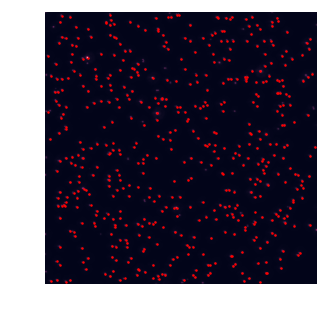

In [72]:
plt.figure(figsize=(5,5));
plt.imshow(smoothed);
plt.plot(centers[:, 2], centers[:, 1], 'r.', ms=5);
plt.xlim([0, smoothed.shape[0]])
plt.ylim([smoothed.shape[1], 0])
plt.axis('off');

In [73]:
centers

array([[488, 247,  98],
       [486, 140, 148],
       [484, 376, 394],
       ..., 
       [ 15, 150,  18],
       [ 14, 256, 399],
       [ 13,  63,  58]], dtype=int64)

In [82]:
len(centers)

519

In [90]:
Ycenters = centers[:,1]
Xcenters = centers[:,2]

In [89]:
axPSF = PSF['FWHMax']

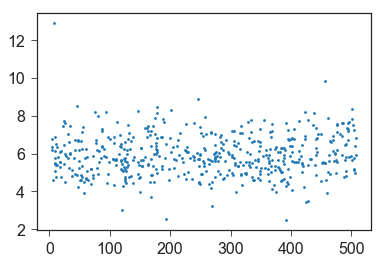

In [98]:
plt.plot(Ycenters,axPSF,'.')

## Plot max projection

In [64]:
beadInd = 14
average = beads[beadInd]

In [20]:
plane = IntSlider(min=0, max=average.shape[0]-1, step=1, value=average.shape[0]/2)
interactive(average, i=plane)

A Jupyter Widget

## Plot 2D slices

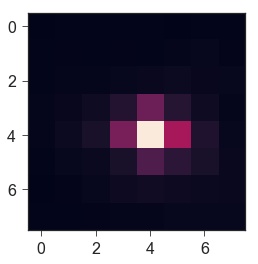

In [65]:
plt.imshow(average.mean(axis=0));
plt.axis('on');

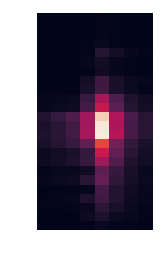

In [66]:
plt.imshow(average.mean(axis=1), aspect = pxPerUmLat/pxPerUmAx);
plt.axis('off');

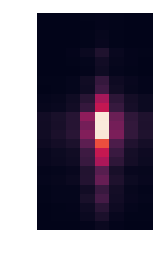

In [67]:
plt.imshow(average.mean(axis=2), aspect = pxPerUmLat/pxPerUmAx);
plt.axis('off');

## Plotting

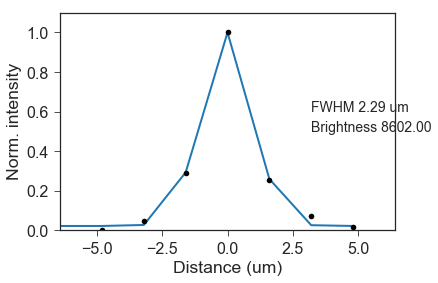

In [68]:
plotPSF(latProfile[beadInd][0],latProfile[beadInd][1],latProfile[beadInd][2],latProfile[beadInd][3],pxPerUmLat,PSF.Max.iloc[beadInd])

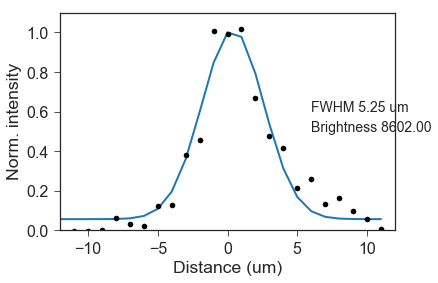

In [69]:
plotPSF(axProfile[beadInd][0],axProfile[beadInd][1],axProfile[beadInd][2],axProfile[beadInd][3],pxPerUmAx,PSF.Max.iloc[beadInd])